In [1]:
import pandas as pd
import numpy as np
import waveform as wf
import fishermatrix as fm
import dataprocess as dp
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = 'Times new roman'  # 设置字体为 Arial
#plt.rcParams['font.size'] = 15

pi = np.pi

In [2]:
data1 = pd.read_fwf('population_data/Klein16_PopIII.txt', header=None)
print(data1)

               0             1             2       3       4         5   \
0        4.868000  5.115300e+02  3.196700e+02  0.6169  0.8887  0.192360   
1        6.079000  7.897900e+02  5.361300e+02  0.9892  0.9185  0.207690   
2        4.117300  6.501500e+02  2.719900e+02  0.9859  0.7554  0.176040   
3       11.812000  4.517400e+02  2.689900e+02  0.1230  0.9504  0.255560   
4       10.420000  3.092800e+02  2.744700e+02  0.9162  0.3930  0.216130   
...           ...           ...           ...     ...     ...       ...   
727868   0.230510  1.334400e+08  6.222700e+07  0.0723  0.0954  0.078249   
727869   0.141420  8.654300e+09  4.267100e+09  0.5593  0.3198  1.446300   
727870   0.195450  1.406000e+09  8.999200e+08  0.5547  0.6793  0.813910   
727871   0.049028  1.985400e+09  1.743600e+09  0.0947  0.0355  1.826500   
727872   0.017783  1.218600e+09  8.197600e+08  0.6526  0.6161  2.378200   

             6         7       8        9   ...         13            14  \
0       0.13518  0.1294

In [35]:
np.random.seed(234)
SNR_threshold = 8.0
event_rate = 1000
len_popu = len(data1.iloc[:,1])-1
#太极单个有无gap
d_tj1 = [];d_tj2 = [];d_tj3 = [];d_tj4 = []
d_tj5 = [];d_tj6 = [];d_tj7 = [];d_tj8 = []
d_tjgp1 = [];d_tjgp2 = [];d_tjgp3 = [];d_tjgp4 = []
d_tjgp5 = [];d_tjgp6 = [];d_tjgp7 = [];d_tjgp8 = []

#Lisa单个有无gap
d_ls1=[];d_ls2=[];d_ls3=[];d_ls4=[]
d_ls5=[];d_ls6=[];d_ls7=[];d_ls8=[]
d_lsgp1 = [];d_lsgp2 = [];d_lsgp3 = [];d_lsgp4 = []
d_lsgp5 = [];d_lsgp6 = [];d_lsgp7 = [];d_lsgp8 = []

#太极-天琴联合有无gap
d_tjtq1=[];d_tjtq2=[];d_tjtq3=[];d_tjtq4=[]
d_tjtq5=[];d_tjtq6=[];d_tjtq7=[];d_tjtq8=[]
d_tjtqgp1 = [];d_tjtqgp2 = [];d_tjtqgp3 = [];d_tjtqgp4 = []
d_tjtqgp5 = [];d_tjtqgp6 = [];d_tjtqgp7 = [];d_tjtqgp8 = []

#太极-LISA联合有无gap
d_tjls1=[];d_tjls2=[];d_tjls3=[];d_tjls4=[]
d_tjls5=[];d_tjls6=[];d_tjls7=[];d_tjls8=[]
d_tjlsgp1=[];d_tjlsgp2=[];d_tjlsgp3=[];d_tjlsgp4=[]
d_tjlsgp5=[];d_tjlsgp6=[];d_tjlsgp7=[];d_tjlsgp8=[]

freq = np.arange(1e-5,1,1e-5)
num = 0
for nn in tqdm(range(event_rate)):
    mm = 3*nn+1
    red,m1,m2,Mass = data1.iloc[mm,0],data1.iloc[mm,1],data1.iloc[mm,2],data1.iloc[mm,10]
    if 1e5<Mass<1e8:
        #给定各个参数
        ratio = m1/m2
        angles = np.random.uniform(0,pi,3)
        random1,random2,random3 = np.random.uniform(0,1,3)
        para = [Mass,ratio,red]
        fi = wf.fin(Mass,ratio)
        fe = wf.fout(Mass,ratio)
        freq_rd = np.arange(1e-5,1,1e-5)

        #计算SNR是否达到阈值，以LISA作为标志
        sig_ls = wf.sfa(freq_rd,para,angles,'ls')
        snr_ls = dp.SNR(sig_ls,sig_ls,wf.PSD_ls(freq_rd),1e-5)
        if snr_ls>SNR_threshold:
            num+=1

            #计算太极天琴无gap的联合观测
            tjtq = fm.comb_fm(para,angles,'tj','tq')
            d_tjtq1.append(tjtq[0]);d_tjtq2.append(tjtq[1]);d_tjtq3.append(tjtq[2]);d_tjtq4.append(tjtq[3])
            d_tjtq5.append(tjtq[4]);d_tjtq6.append(tjtq[5]);d_tjtq7.append(tjtq[6]);d_tjtq8.append(tjtq[7])
            
            tjtqgp = fm.gp_comb_fm(freq,para,angles,random1,random2,'tj','tq')
            #太极天琴随机gap的联合观测
            d_tjtqgp1.append(tjtqgp[0]);d_tjtqgp2.append(tjtqgp[1]);d_tjtqgp3.append(tjtqgp[2]);d_tjtqgp4.append(tjtqgp[3])
            d_tjtqgp5.append(tjtqgp[4]);d_tjtqgp6.append(tjtqgp[5]);d_tjtqgp7.append(tjtqgp[6]);d_tjtqgp8.append(tjtqgp[7])
            #太极随机gap
            d_tjgp1.append(tjtqgp[8][0]);d_tjgp2.append(tjtqgp[8][1]);d_tjgp3.append(tjtqgp[8][2]);d_tjgp4.append(tjtqgp[8][3])
            d_tjgp5.append(tjtqgp[8][4]);d_tjgp6.append(tjtqgp[8][5]);d_tjgp7.append(tjtqgp[8][6]);d_tjgp8.append(tjtqgp[8][7])

            #太极无gap
            tj = fm.tj_fm(para,angles)
            d_tj1.append(tj[0]);d_tj2.append(tj[1]);d_tj3.append(tj[2]);d_tj4.append(tj[3])
            d_tj5.append(tj[4]);d_tj6.append(tj[5]);d_tj7.append(tj[6]);d_tj8.append(tj[7])

            #太极LISA无gap联合观测
            tjls = fm.comb_fm(para,angles,'tj','ls')
            d_tjls1.append(tjls[0]);d_tjls2.append(tjls[1]);d_tjls3.append(tjls[2]);d_tjls4.append(tjls[3])
            d_tjls5.append(tjls[4]);d_tjls6.append(tjls[5]);d_tjls7.append(tjls[6]);d_tjls8.append(tjls[7])

            lstjgp = fm.gp_comb_fm(freq,para,angles,random3,random1,'ls','tj')
            #太极LISA随机gap
            d_tjlsgp1.append(lstjgp[0]);d_tjlsgp2.append(lstjgp[1]);d_tjlsgp3.append(lstjgp[2]);d_tjlsgp4.append(lstjgp[3])
            d_tjlsgp5.append(lstjgp[4]);d_tjlsgp6.append(lstjgp[5]);d_tjlsgp7.append(lstjgp[6]);d_tjlsgp8.append(lstjgp[7])
            #LISA随机gap
            d_lsgp1.append(lstjgp[8][0]);d_lsgp2.append(lstjgp[8][1]);d_lsgp3.append(lstjgp[8][2]);d_lsgp4.append(lstjgp[8][3])
            d_lsgp5.append(lstjgp[8][4]);d_lsgp6.append(lstjgp[8][5]);d_lsgp7.append(lstjgp[8][6]);d_lsgp8.append(lstjgp[8][7])

            #LISA无gap
            ls = fm.ls_fm(para,angles)
            d_ls1.append(ls[0]);d_ls2.append(ls[1]);d_ls3.append(ls[2]);d_ls4.append(ls[3])
            d_ls5.append(ls[4]);d_ls6.append(ls[5]);d_ls7.append(ls[6]);d_ls8.append(ls[7])
print(nn)
print(num)
delta_tj_p3 = np.array([d_tj1,d_tj2,d_tj3,d_tj4,d_tj5,d_tj6,d_tj7,d_tj8])
delta_tjgp_p3 = np.array([d_tjgp1,d_tjgp2,d_tjgp3,d_tjgp4,d_tjgp5,d_tjgp6,d_tjgp7,d_tjgp8])
delta_ls_p3 = np.array([d_ls1,d_ls2,d_ls3,d_ls4,d_ls5,d_ls6,d_ls7,d_ls8])
delta_lsgp_p3 = np.array([d_lsgp1,d_lsgp2,d_lsgp3,d_lsgp4,d_lsgp5,d_lsgp6,d_lsgp7,d_lsgp8])
delta_tjtq_p3 = np.array([d_tjtq1,d_tjtq2,d_tjtq3,d_tjtq4,d_tjtq5,d_tjtq6,d_tjtq7,d_tjtq8])
delta_tjtqgp_p3 = np.array([d_tjtqgp1,d_tjtqgp2,d_tjtqgp3,d_tjtqgp4,d_tjtqgp5,d_tjtqgp6,d_tjtqgp7,d_tjtqgp8])
delta_tjls_p3 = np.array([d_tjls1,d_tjls2,d_tjls3,d_tjls4,d_tjls5,d_tjls6,d_tjls7,d_tjls8])
delta_tjlsgp_p3 = np.array([d_tjlsgp1,d_tjlsgp2,d_tjlsgp3,d_tjlsgp4,d_tjlsgp5,d_tjlsgp6,d_tjlsgp7,d_tjlsgp8])

d1_tj_p3 = np.abs(delta_tjgp_p3/delta_tj_p3)
d1_tjtq_p3 = np.abs(delta_tjtqgp_p3/delta_tjtq_p3)
d1_ls_p3 = np.abs(delta_lsgp_p3/delta_ls_p3)
d1_tjls_p3 = np.abs(delta_tjlsgp_p3/delta_tjls_p3)

100%|██████████| 1000/1000 [13:55<00:00,  1.20it/s]


In [43]:
data2 = pd.read_fwf('population_data/Klein16_Q3delays.txt', header=None)
np.random.seed(234)
SNR_threshold = 8.0
event_rate = 38
len_popu = len(data1.iloc[:,1])-1
#太极单个有无gap
d_tj1 = [];d_tj2 = [];d_tj3 = [];d_tj4 = []
d_tj5 = [];d_tj6 = [];d_tj7 = [];d_tj8 = []
d_tjgp1 = [];d_tjgp2 = [];d_tjgp3 = [];d_tjgp4 = []
d_tjgp5 = [];d_tjgp6 = [];d_tjgp7 = [];d_tjgp8 = []

#Lisa单个有无gap
d_ls1=[];d_ls2=[];d_ls3=[];d_ls4=[]
d_ls5=[];d_ls6=[];d_ls7=[];d_ls8=[]
d_lsgp1 = [];d_lsgp2 = [];d_lsgp3 = [];d_lsgp4 = []
d_lsgp5 = [];d_lsgp6 = [];d_lsgp7 = [];d_lsgp8 = []

#太极-天琴联合有无gap
d_tjtq1=[];d_tjtq2=[];d_tjtq3=[];d_tjtq4=[]
d_tjtq5=[];d_tjtq6=[];d_tjtq7=[];d_tjtq8=[]
d_tjtqgp1 = [];d_tjtqgp2 = [];d_tjtqgp3 = [];d_tjtqgp4 = []
d_tjtqgp5 = [];d_tjtqgp6 = [];d_tjtqgp7 = [];d_tjtqgp8 = []

#太极-LISA联合有无gap
d_tjls1=[];d_tjls2=[];d_tjls3=[];d_tjls4=[]
d_tjls5=[];d_tjls6=[];d_tjls7=[];d_tjls8=[]
d_tjlsgp1=[];d_tjlsgp2=[];d_tjlsgp3=[];d_tjlsgp4=[]
d_tjlsgp5=[];d_tjlsgp6=[];d_tjlsgp7=[];d_tjlsgp8=[]

freq = np.arange(1e-5,1,1e-5)
num = 0
for nn in tqdm(range(event_rate)):
    mm = 3*nn+1
    red,m1,m2,Mass = data2.iloc[mm,0],data2.iloc[mm,1],data2.iloc[mm,2],data2.iloc[mm,10]
    if 1e5<Mass<1e8:
        #给定各个参数
        ratio = m1/m2
        angles = np.random.uniform(0,pi,3)
        random1,random2,random3 = np.random.uniform(0,1,3)
        para = [Mass,ratio,red]
        fi = wf.fin(Mass,ratio)
        fe = wf.fout(Mass,ratio)
        freq_rd = np.arange(1e-5,1,1e-5)

        #计算SNR是否达到阈值，以LISA作为标志
        sig_ls = wf.sfa(freq_rd,para,angles,'ls')
        snr_ls = dp.SNR(sig_ls,sig_ls,wf.PSD_ls(freq_rd),1e-5)
        if snr_ls>SNR_threshold:
            num+=1

            #计算太极天琴无gap的联合观测
            tjtq = fm.comb_fm(para,angles,'tj','tq')
            d_tjtq1.append(tjtq[0]);d_tjtq2.append(tjtq[1]);d_tjtq3.append(tjtq[2]);d_tjtq4.append(tjtq[3])
            d_tjtq5.append(tjtq[4]);d_tjtq6.append(tjtq[5]);d_tjtq7.append(tjtq[6]);d_tjtq8.append(tjtq[7])
            
            tjtqgp = fm.gp_comb_fm(freq,para,angles,random1,random2,'tj','tq')
            #太极天琴随机gap的联合观测
            d_tjtqgp1.append(tjtqgp[0]);d_tjtqgp2.append(tjtqgp[1]);d_tjtqgp3.append(tjtqgp[2]);d_tjtqgp4.append(tjtqgp[3])
            d_tjtqgp5.append(tjtqgp[4]);d_tjtqgp6.append(tjtqgp[5]);d_tjtqgp7.append(tjtqgp[6]);d_tjtqgp8.append(tjtqgp[7])
            #太极随机gap
            d_tjgp1.append(tjtqgp[8][0]);d_tjgp2.append(tjtqgp[8][1]);d_tjgp3.append(tjtqgp[8][2]);d_tjgp4.append(tjtqgp[8][3])
            d_tjgp5.append(tjtqgp[8][4]);d_tjgp6.append(tjtqgp[8][5]);d_tjgp7.append(tjtqgp[8][6]);d_tjgp8.append(tjtqgp[8][7])

            #太极无gap
            tj = fm.tj_fm(para,angles)
            d_tj1.append(tj[0]);d_tj2.append(tj[1]);d_tj3.append(tj[2]);d_tj4.append(tj[3])
            d_tj5.append(tj[4]);d_tj6.append(tj[5]);d_tj7.append(tj[6]);d_tj8.append(tj[7])

            #太极LISA无gap联合观测
            tjls = fm.comb_fm(para,angles,'tj','ls')
            d_tjls1.append(tjls[0]);d_tjls2.append(tjls[1]);d_tjls3.append(tjls[2]);d_tjls4.append(tjls[3])
            d_tjls5.append(tjls[4]);d_tjls6.append(tjls[5]);d_tjls7.append(tjls[6]);d_tjls8.append(tjls[7])

            lstjgp = fm.gp_comb_fm(freq,para,angles,random3,random1,'ls','tj')
            #太极LISA随机gap
            d_tjlsgp1.append(lstjgp[0]);d_tjlsgp2.append(lstjgp[1]);d_tjlsgp3.append(lstjgp[2]);d_tjlsgp4.append(lstjgp[3])
            d_tjlsgp5.append(lstjgp[4]);d_tjlsgp6.append(lstjgp[5]);d_tjlsgp7.append(lstjgp[6]);d_tjlsgp8.append(lstjgp[7])
            #LISA随机gap
            d_lsgp1.append(lstjgp[8][0]);d_lsgp2.append(lstjgp[8][1]);d_lsgp3.append(lstjgp[8][2]);d_lsgp4.append(lstjgp[8][3])
            d_lsgp5.append(lstjgp[8][4]);d_lsgp6.append(lstjgp[8][5]);d_lsgp7.append(lstjgp[8][6]);d_lsgp8.append(lstjgp[8][7])

            #LISA无gap
            ls = fm.ls_fm(para,angles)
            d_ls1.append(ls[0]);d_ls2.append(ls[1]);d_ls3.append(ls[2]);d_ls4.append(ls[3])
            d_ls5.append(ls[4]);d_ls6.append(ls[5]);d_ls7.append(ls[6]);d_ls8.append(ls[7])
print(nn)
print(num)
delta_tj_d = np.array([d_tj1,d_tj2,d_tj3,d_tj4,d_tj5,d_tj6,d_tj7,d_tj8])
delta_tjgp_d = np.array([d_tjgp1,d_tjgp2,d_tjgp3,d_tjgp4,d_tjgp5,d_tjgp6,d_tjgp7,d_tjgp8])
delta_ls_d = np.array([d_ls1,d_ls2,d_ls3,d_ls4,d_ls5,d_ls6,d_ls7,d_ls8])
delta_lsgp_d = np.array([d_lsgp1,d_lsgp2,d_lsgp3,d_lsgp4,d_lsgp5,d_lsgp6,d_lsgp7,d_lsgp8])
delta_tjtq_d = np.array([d_tjtq1,d_tjtq2,d_tjtq3,d_tjtq4,d_tjtq5,d_tjtq6,d_tjtq7,d_tjtq8])
delta_tjtqgp_d = np.array([d_tjtqgp1,d_tjtqgp2,d_tjtqgp3,d_tjtqgp4,d_tjtqgp5,d_tjtqgp6,d_tjtqgp7,d_tjtqgp8])
delta_tjls_d = np.array([d_tjls1,d_tjls2,d_tjls3,d_tjls4,d_tjls5,d_tjls6,d_tjls7,d_tjls8])
delta_tjlsgp_d = np.array([d_tjlsgp1,d_tjlsgp2,d_tjlsgp3,d_tjlsgp4,d_tjlsgp5,d_tjlsgp6,d_tjlsgp7,d_tjlsgp8])

d2_tj = np.abs(delta_tjgp_d/delta_tj_d)
d2_tjtq = np.abs(delta_tjtqgp_d/delta_tjtq_d)
d2_ls = np.abs(delta_lsgp_d/delta_ls_d)
d2_tjls = np.abs(delta_tjlsgp_d/delta_tjls_d)

100%|██████████| 38/38 [13:22<00:00, 21.12s/it]


In [61]:
data3 = pd.read_fwf('population_data/Klein16_Q3nodelays.txt', header=None)
np.random.seed(234)
SNR_threshold = 8.0
event_rate = 600
len_popu = len(data2.iloc[:,1])-1
print(len_popu)
#太极单个有无gap
d_tj1 = [];d_tj2 = [];d_tj3 = [];d_tj4 = []
d_tj5 = [];d_tj6 = [];d_tj7 = [];d_tj8 = []
d_tjgp1 = [];d_tjgp2 = [];d_tjgp3 = [];d_tjgp4 = []
d_tjgp5 = [];d_tjgp6 = [];d_tjgp7 = [];d_tjgp8 = []

#Lisa单个有无gap
d_ls1=[];d_ls2=[];d_ls3=[];d_ls4=[]
d_ls5=[];d_ls6=[];d_ls7=[];d_ls8=[]
d_lsgp1 = [];d_lsgp2 = [];d_lsgp3 = [];d_lsgp4 = []
d_lsgp5 = [];d_lsgp6 = [];d_lsgp7 = [];d_lsgp8 = []

#太极-天琴联合有无gap
d_tjtq1=[];d_tjtq2=[];d_tjtq3=[];d_tjtq4=[]
d_tjtq5=[];d_tjtq6=[];d_tjtq7=[];d_tjtq8=[]
d_tjtqgp1 = [];d_tjtqgp2 = [];d_tjtqgp3 = [];d_tjtqgp4 = []
d_tjtqgp5 = [];d_tjtqgp6 = [];d_tjtqgp7 = [];d_tjtqgp8 = []

#太极-LISA联合有无gap
d_tjls1=[];d_tjls2=[];d_tjls3=[];d_tjls4=[]
d_tjls5=[];d_tjls6=[];d_tjls7=[];d_tjls8=[]
d_tjlsgp1=[];d_tjlsgp2=[];d_tjlsgp3=[];d_tjlsgp4=[]
d_tjlsgp5=[];d_tjlsgp6=[];d_tjlsgp7=[];d_tjlsgp8=[]

freq = np.arange(1e-5,1,1e-5)
num = 0
for nn in tqdm(range(event_rate)):
    mm = 3*nn+1
    red,m1,m2,Mass = data3.iloc[mm,0],data3.iloc[mm,1],data3.iloc[mm,2],data3.iloc[mm,10]
    if 1e5<Mass<1e8:
        #给定各个参数
        ratio = m1/m2
        angles = np.random.uniform(0,pi,3)
        random1,random2,random3 = np.random.uniform(0,1,3)
        para = [Mass,ratio,red]
        fi = wf.fin(Mass,ratio)
        fe = wf.fout(Mass,ratio)
        freq_rd = np.arange(1e-5,1,1e-5)

        #计算SNR是否达到阈值，以LISA作为标志
        sig_ls = wf.sfa(freq_rd,para,angles,'ls')
        snr_ls = dp.SNR(sig_ls,sig_ls,wf.PSD_ls(freq_rd),1e-5)
        if snr_ls>SNR_threshold:
            num+=1

            #计算太极天琴无gap的联合观测
            tjtq = fm.comb_fm(para,angles,'tj','tq')
            d_tjtq1.append(tjtq[0]);d_tjtq2.append(tjtq[1]);d_tjtq3.append(tjtq[2]);d_tjtq4.append(tjtq[3])
            d_tjtq5.append(tjtq[4]);d_tjtq6.append(tjtq[5]);d_tjtq7.append(tjtq[6]);d_tjtq8.append(tjtq[7])
            
            tjtqgp = fm.gp_comb_fm(freq,para,angles,random1,random2,'tj','tq')
            #太极天琴随机gap的联合观测
            d_tjtqgp1.append(tjtqgp[0]);d_tjtqgp2.append(tjtqgp[1]);d_tjtqgp3.append(tjtqgp[2]);d_tjtqgp4.append(tjtqgp[3])
            d_tjtqgp5.append(tjtqgp[4]);d_tjtqgp6.append(tjtqgp[5]);d_tjtqgp7.append(tjtqgp[6]);d_tjtqgp8.append(tjtqgp[7])
            #太极随机gap
            d_tjgp1.append(tjtqgp[8][0]);d_tjgp2.append(tjtqgp[8][1]);d_tjgp3.append(tjtqgp[8][2]);d_tjgp4.append(tjtqgp[8][3])
            d_tjgp5.append(tjtqgp[8][4]);d_tjgp6.append(tjtqgp[8][5]);d_tjgp7.append(tjtqgp[8][6]);d_tjgp8.append(tjtqgp[8][7])

            #太极无gap
            tj = fm.tj_fm(para,angles)
            d_tj1.append(tj[0]);d_tj2.append(tj[1]);d_tj3.append(tj[2]);d_tj4.append(tj[3])
            d_tj5.append(tj[4]);d_tj6.append(tj[5]);d_tj7.append(tj[6]);d_tj8.append(tj[7])

            #太极LISA无gap联合观测
            tjls = fm.comb_fm(para,angles,'tj','ls')
            d_tjls1.append(tjls[0]);d_tjls2.append(tjls[1]);d_tjls3.append(tjls[2]);d_tjls4.append(tjls[3])
            d_tjls5.append(tjls[4]);d_tjls6.append(tjls[5]);d_tjls7.append(tjls[6]);d_tjls8.append(tjls[7])

            lstjgp = fm.gp_comb_fm(freq,para,angles,random3,random1,'ls','tj')
            #太极LISA随机gap
            d_tjlsgp1.append(lstjgp[0]);d_tjlsgp2.append(lstjgp[1]);d_tjlsgp3.append(lstjgp[2]);d_tjlsgp4.append(lstjgp[3])
            d_tjlsgp5.append(lstjgp[4]);d_tjlsgp6.append(lstjgp[5]);d_tjlsgp7.append(lstjgp[6]);d_tjlsgp8.append(lstjgp[7])
            #LISA随机gap
            d_lsgp1.append(lstjgp[8][0]);d_lsgp2.append(lstjgp[8][1]);d_lsgp3.append(lstjgp[8][2]);d_lsgp4.append(lstjgp[8][3])
            d_lsgp5.append(lstjgp[8][4]);d_lsgp6.append(lstjgp[8][5]);d_lsgp7.append(lstjgp[8][6]);d_lsgp8.append(lstjgp[8][7])

            #LISA无gap
            ls = fm.ls_fm(para,angles)
            d_ls1.append(ls[0]);d_ls2.append(ls[1]);d_ls3.append(ls[2]);d_ls4.append(ls[3])
            d_ls5.append(ls[4]);d_ls6.append(ls[5]);d_ls7.append(ls[6]);d_ls8.append(ls[7])
print(nn)
print(num)
delta_tj_nd = np.array([d_tj1,d_tj2,d_tj3,d_tj4,d_tj5,d_tj6,d_tj7,d_tj8])
delta_tjgp_nd = np.array([d_tjgp1,d_tjgp2,d_tjgp3,d_tjgp4,d_tjgp5,d_tjgp6,d_tjgp7,d_tjgp8])
delta_ls_nd = np.array([d_ls1,d_ls2,d_ls3,d_ls4,d_ls5,d_ls6,d_ls7,d_ls8])
delta_lsgp_nd = np.array([d_lsgp1,d_lsgp2,d_lsgp3,d_lsgp4,d_lsgp5,d_lsgp6,d_lsgp7,d_lsgp8])
delta_tjtq_nd = np.array([d_tjtq1,d_tjtq2,d_tjtq3,d_tjtq4,d_tjtq5,d_tjtq6,d_tjtq7,d_tjtq8])
delta_tjtqgp_nd = np.array([d_tjtqgp1,d_tjtqgp2,d_tjtqgp3,d_tjtqgp4,d_tjtqgp5,d_tjtqgp6,d_tjtqgp7,d_tjtqgp8])
delta_tjls_nd = np.array([d_tjls1,d_tjls2,d_tjls3,d_tjls4,d_tjls5,d_tjls6,d_tjls7,d_tjls8])
delta_tjlsgp_nd = np.array([d_tjlsgp1,d_tjlsgp2,d_tjlsgp3,d_tjlsgp4,d_tjlsgp5,d_tjlsgp6,d_tjlsgp7,d_tjlsgp8])

d3_tj = np.abs(delta_tjgp_nd/delta_tj_nd)
d3_tjtq = np.abs(delta_tjtqgp_nd/delta_tjtq_nd)
d3_ls = np.abs(delta_lsgp_nd/delta_ls_nd)
d3_tjls = np.abs(delta_tjlsgp_nd/delta_tjls_nd)

36821


  1%|          | 7/600 [00:01<02:17,  4.30it/s]


KeyboardInterrupt: 

In [68]:
num

328

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


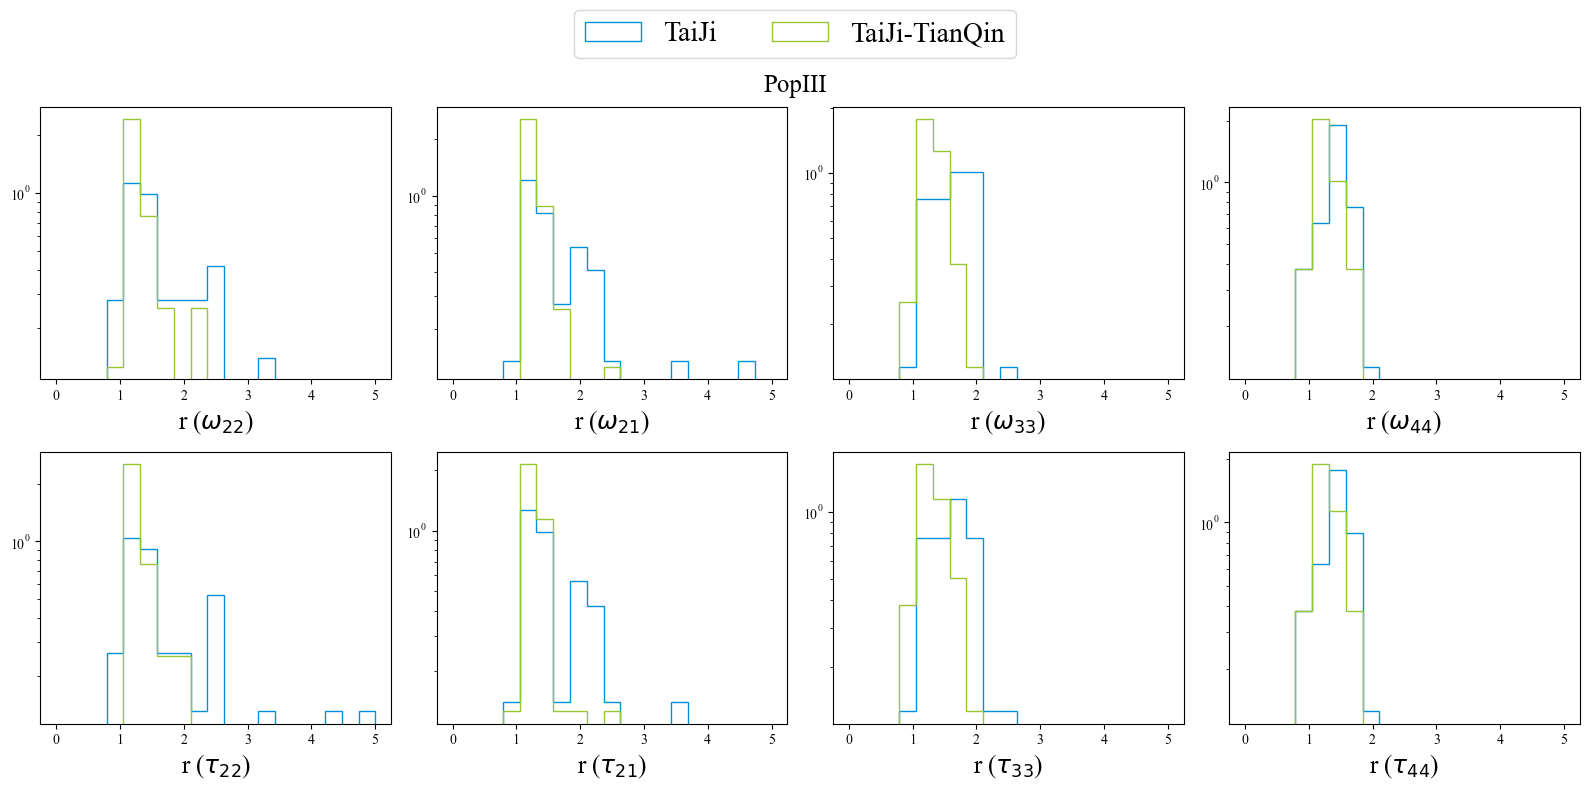

In [37]:
# 设置相同的x轴范围和bins
bins = np.linspace(0, 5, 30)
#xlim = (1, 1000)

# 创建图形和子图
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# 在每个子图上绘制多个直方图
numij = 0
for i in range(2):
    for j in range(4):
        
        axs[i, j].hist(d1_tj[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[i, j].hist(d1_tjtq[numij], bins=bins, histtype='step', color='#96C535', density=True)

        
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        numij +=1
        #axs[i, j].set_xlim(xlim)

# 添加各个子图的标签
labels = [r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)']

for ax, label in zip(axs.flat, labels):
    ax.set_xlabel(label,fontsize=18)
    

# 在第一行子图上方添加标题
fig.text(0.5, 0.88, 'PopIII', ha='center', fontsize=18)  # 调整标题的位置

# 添加图例
fig.legend(['TaiJi','TaiJi-TianQin'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), fontsize=20)

# 调整布局
plt.subplots_adjust(top=0.88, bottom=0.1)  # 调整 top 参数以预留足够空间
plt.tight_layout(rect=[0, 0, 1, 0.88])

# 显示图形
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/PopIII Taiji-Tianqin.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/PopIII Taiji-Tianqin.png")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


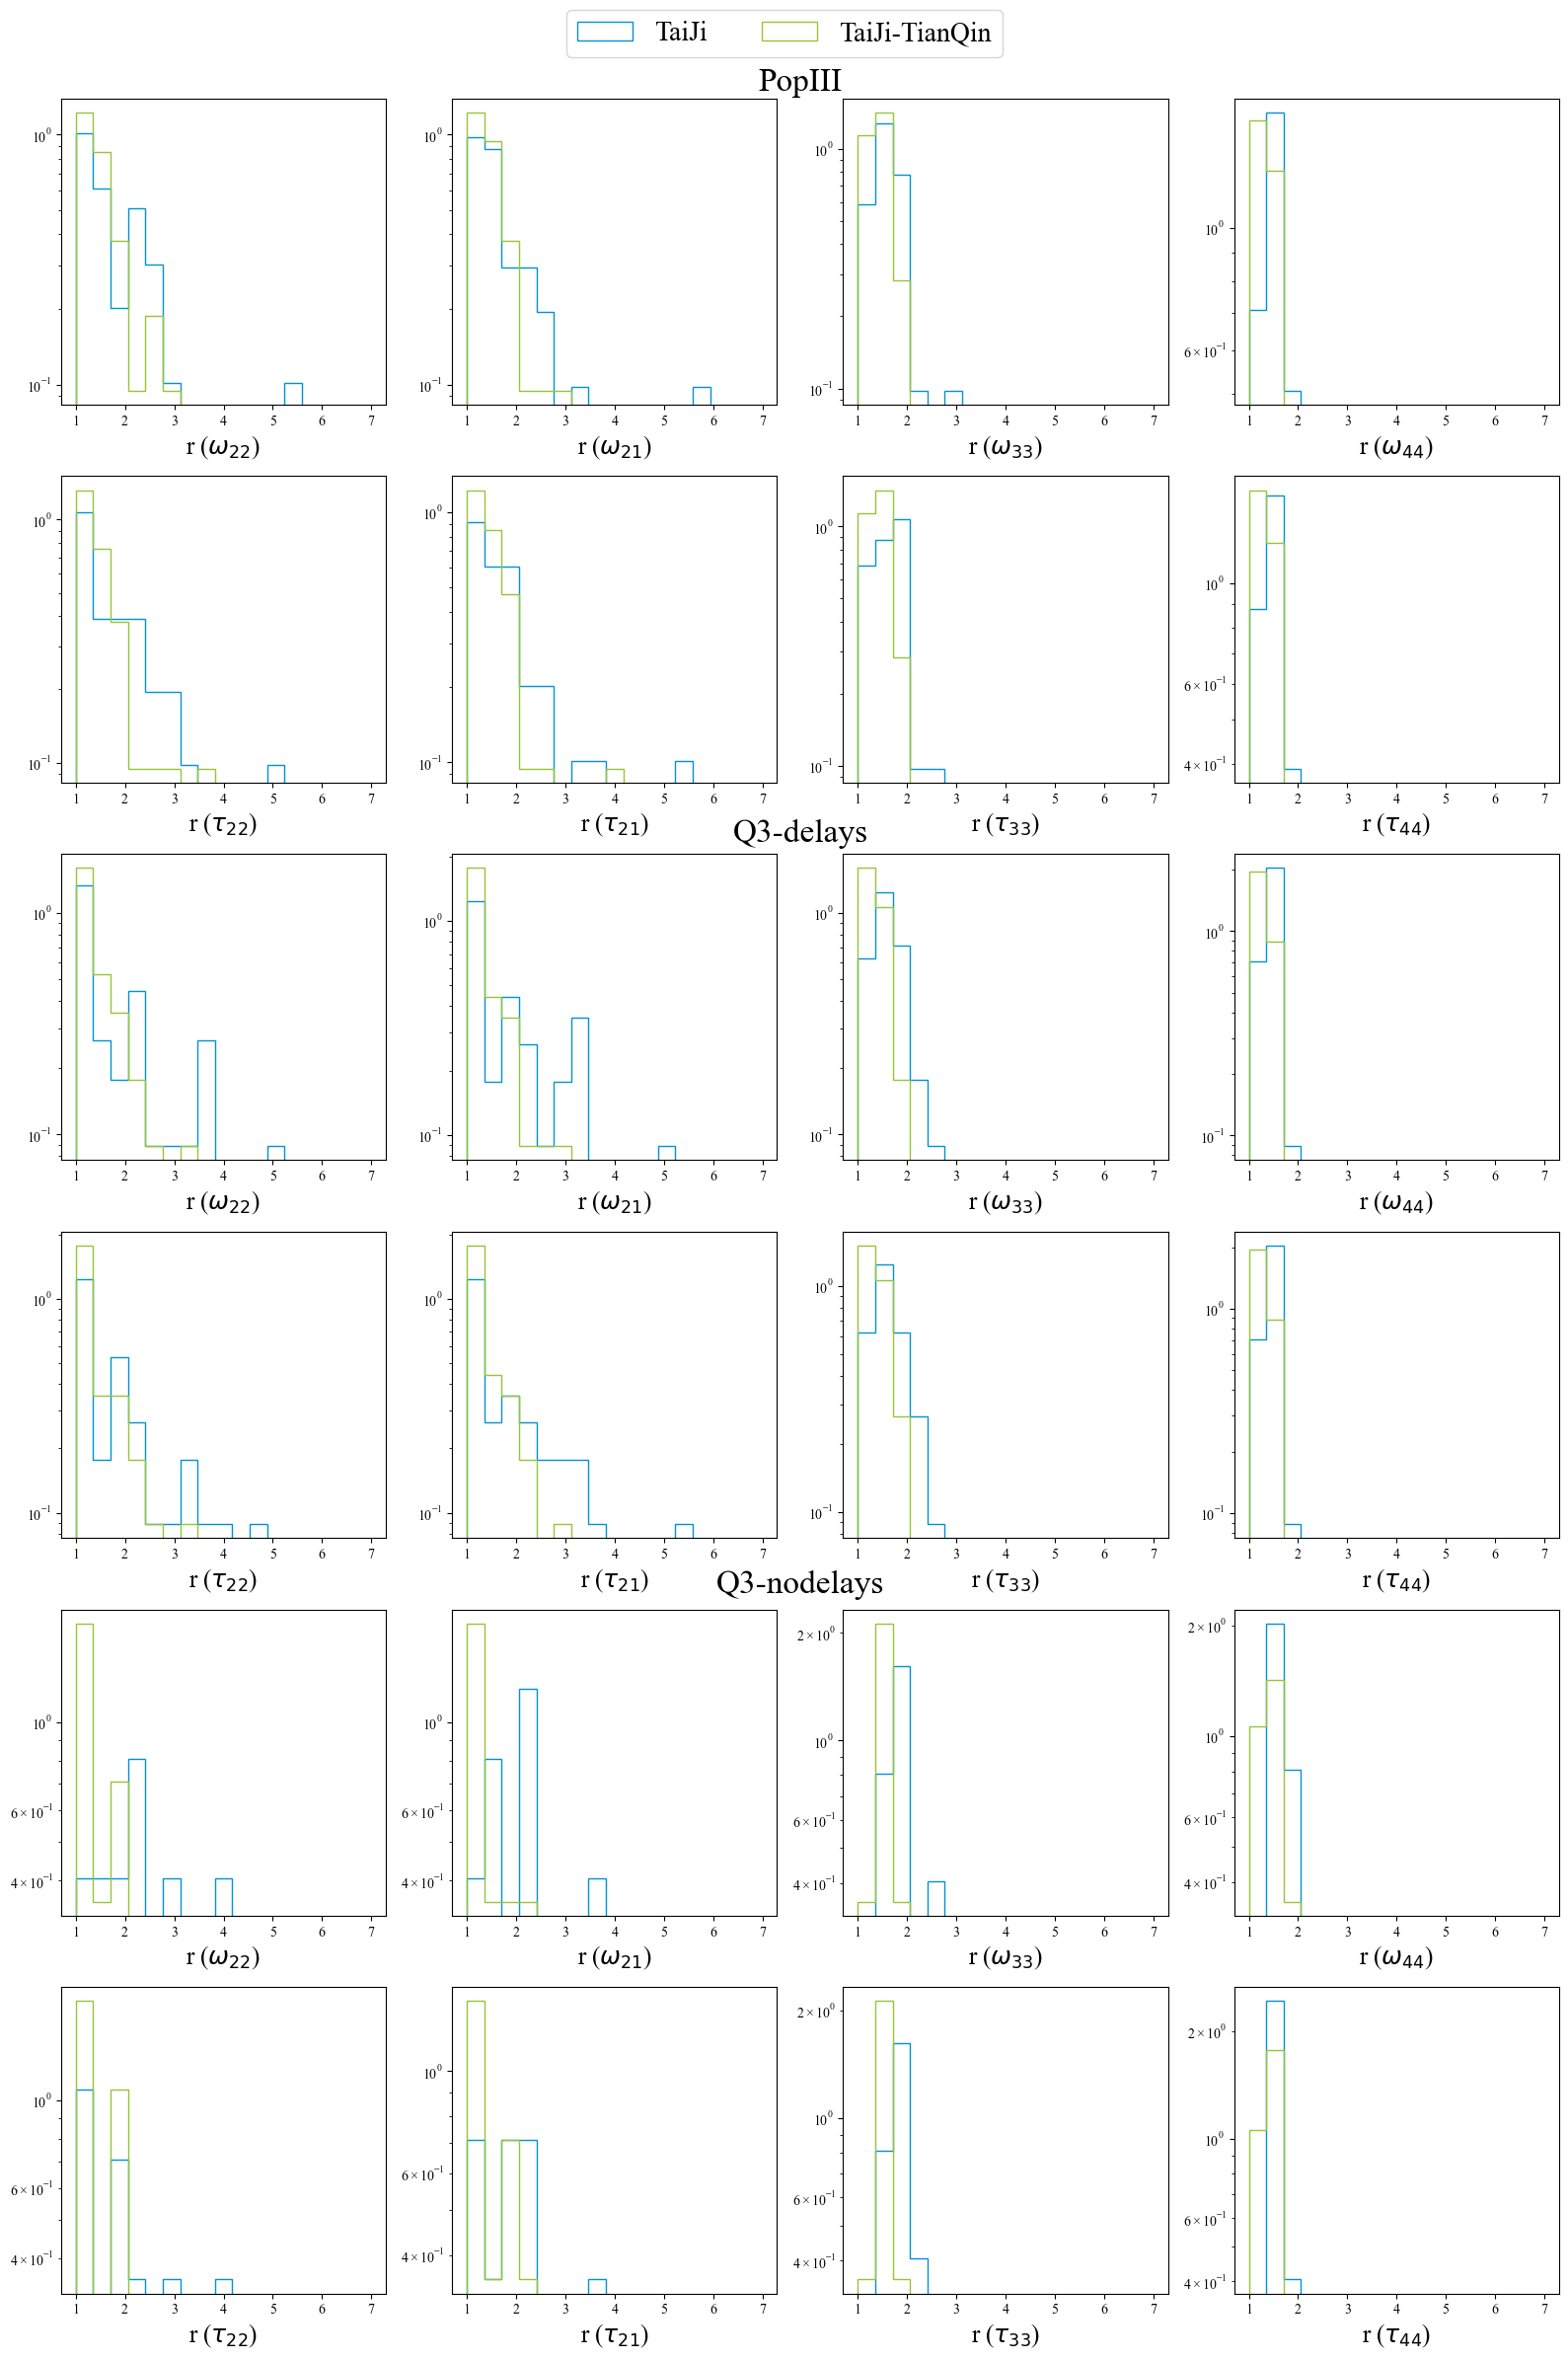

In [48]:
bins = np.linspace(1, 7, 18)
#xlim = (1, 1000)

# 创建图形和子图
fig, axs = plt.subplots(6, 4, figsize=(16, 24))
xticks = [1, 2, 3, 4, 5,6,7]
# 在每个子图上绘制多个直方图
numij = 0
for i in range(2):
    for j in range(4):
        
        axs[i, j].hist(d1_tj[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[i, j].hist(d1_tjtq[numij], bins=bins, histtype='step', color='#96C535', density=True)

        
        axs[i, j].set_xticks(xticks)
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        numij +=1
numij = 0
for i in range(2):
    for j in range(4):
        ii = i+2
        axs[ii, j].hist(d2_tj[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[ii, j].hist(d2_tjtq[numij], bins=bins, histtype='step', color='#96C535', density=True)

        axs[ii, j].set_xticks(xticks)
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[ii, j].set_xscale('log')
        axs[ii, j].set_yscale('log')
        numij +=1
numij = 0
for i in range(2):
    for j in range(4):
        iii = i+4
        axs[iii, j].hist(d3_tj[numij], bins=bins, histtype='step', color='#0091D8', density=True)
        axs[iii, j].hist(d3_tjtq[numij], bins=bins, histtype='step', color='#96C535', density=True)
        axs[iii, j].set_xticks(xticks)
        #axs[i, j].hist(data3, bins=bins, histtype='step', color='green', density=True)
        #axs[iii, j].set_xscale('log')
        axs[iii, j].set_yscale('log')
        numij +=1

# 添加各个子图的标签
labels = [r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)',
          r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)',
          r'r ($\omega_{22}$)', r'r ($\omega_{21}$)', r'r ($\omega_{33}$)', r'r ($\omega_{44}$)',  
          r'r ($\tau_{22}$)', r'r ($\tau_{21}$)', r'r ($\tau_{33}$)', r'r ($\tau_{44}$)']

for ax, label in zip(axs.flat, labels):
    ax.set_xlabel(label,fontsize=18)
    

# 在第一行子图上方添加标题
fig.text(0.51, 0.96, 'PopIII', ha='center', fontsize=24)  
fig.text(0.51, 0.643, 'Q3-delays', ha='center', fontsize=24)
fig.text(0.51, 0.326, 'Q3-nodelays', ha='center', fontsize=24)
# 添加图例
fig.legend(['TaiJi', 'TaiJi-TianQin'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.0), fontsize=20)

# 调整布局
#plt.subplots_adjust(bottom=0.1)  # 调整 top 参数以预留足够空间
plt.tight_layout(rect=[0, 0, 1, 0.963])

# 显示图形
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/catalog_tjtq_new.eps")
plt.savefig("C:/Users/indigo/Desktop/paper/my own/figures/catalog_tjtq_new.png")
plt.show()